In [101]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np

In [102]:
df = pd.read_csv('train.csv', na_values='Not Available')

In [103]:
df.head() 

,Id,Category,Tweet
0,635769805279248384,negative,NaN
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [104]:
df.shape

(5970, 3)

In [105]:
df['Id'][0]

'635769805279248384'

In [106]:
df.Category[0]

'negative'

In [107]:
df.head()

,Id,Category,Tweet
0,635769805279248384,negative,NaN
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [108]:
labelMap = {"positive": 0, "neutral": 1, "negative": 2}

In [109]:
df.loc[:, 'Label'] = df.Category

In [110]:
df = df.replace({"Label": labelMap})

In [111]:
df[5928:5931]

,Id,Category,Tweet,Label
5928,629344022163755008,neutral,@MrTransferNewss @FootbaIISources considering ...,1
5929,Id,Tweet,Category,Tweet
5930,629786702052241408,neutral,Zlatan's 20th goal of the season not enough fo...,1


In [112]:
df.head()

,Id,Category,Tweet,Label
0,635769805279248384,negative,NaN,2
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,1
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",1
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,2
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0


In [113]:
df = df[~(df.Label=="Tweet")]
df
# 5929th row was broken, it contained: Id	Tweet	Category 

,Id,Category,Tweet,Label
0,635769805279248384,negative,NaN,2
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,1
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",1
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,2
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0
...,...,...,...,...
5965,639016598477651968,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...,1
5966,640276909633486849,neutral,Rib injury for Zlatan against Russia is a big ...,1
5967,640296841725235200,neutral,Noooooo! I was hoping to see Zlatan being Zlat...,1
5968,641017384908779520,neutral,NaN,1


In [114]:
df.index[(df.Label=="Tweet")].tolist()

[]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


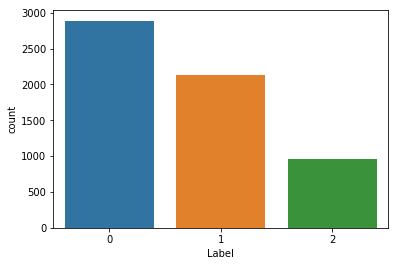

In [115]:
sns.countplot(x= 'Label', data = df)

In [116]:
df_NaN = df[(pd.isna(df.Tweet))]
df_NaN.head()

,Id,Category,Tweet,Label
0,635769805279248384,negative,NaN,2
57,639289589396541440,positive,NaN,0
61,639586654492205056,neutral,NaN,1
71,640324452731875328,positive,NaN,0
72,640329967826440192,positive,NaN,0


In [117]:
len(df)

5969

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


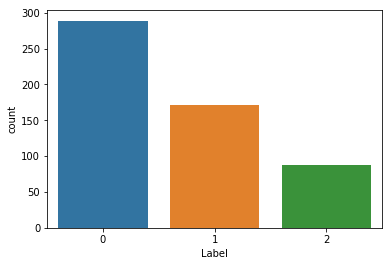

In [118]:
sns.countplot(x= 'Label',data = df_NaN)

In [119]:
df = df[~(pd.isna(df.Tweet))]
df.head()

,Id,Category,Tweet,Label
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,1
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",1
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,2
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0
5,636176272947744772,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu...",1


In [120]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Label'], test_size=0.3)

In [121]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [122]:
y_test.head()

4700    0
5421    0
4557    1
5199    1
2964    1
Name: Label, dtype: int32

In [123]:
X_train.head()

5353    UKIP are the only party offering sensible poli...
4428    @NiallHoran Happy early 22nd b-day hope you ha...
1573    Just got Madonna tickets for the 2nd night at ...
940     @justinlarson34 Justin, I think you got that b...
3857    @ChrissieEvert  Home watching on TV it was obv...
Name: Tweet, dtype: object

In [124]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(X_train.iloc[0]))
print(X_train.iloc[0])

UKIP are the only party offering sensible policies on immigration https t.co/5qza8XTFo6 https t.co/pgPoVNhOhg
UKIP are the only party offering sensible policies on immigration.  https://t.co/5qza8XTFo6   https://t.co/pgPoVNhOhg


In [143]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english') and not
                     word.lower().startswith("http")]
    return clean_mess
print(no_user_alpha(form_sentence(X_train.iloc[0])))
print(X_train.iloc[0])
example = no_user_alpha(form_sentence(X_train.iloc[0]))

['UKIP', 'party', 'offering', 'sensible', 'policies', 'immigration']
UKIP are the only party offering sensible policies on immigration.  https://t.co/5qza8XTFo6   https://t.co/pgPoVNhOhg


In [126]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends adjustable was with whom I used to play, when you called me yesterday'.split()
print(normalization(example))
print(normalization(tweet_list))

['UKIP', 'party', 'offer', 'sensible', 'policies', 'immigration', 'https', 'https']
['I', 'be', 'play', 'with', 'my', 'friends', 'adjustable', 'be', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


In [144]:
def text_processing(tweet):
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english') and not
                     word.lower().startswith("http")]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)



In [141]:
#To był model, którego wyniki wrzuciliśmy na kaggle'a. W dodatku do treningu użyliśmy 100% danych.


pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [129]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [130]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
y_test

4700    0
5421    0
4557    1
5199    1
2964    1
       ..
58      0
1617    2
4804    1
1704    0
1943    0
Name: Label, Length: 1627, dtype: int32

In [132]:
np.sum(y_test == predictions)/len(predictions)

0.53534111862323297

In [133]:
print(accuracy_score(predictions,y_test))

0.535341118623


In [134]:
print(classification_report(predictions, y_test))
print(confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1281
           1       0.28      0.47      0.35       346
           2       0.00      0.00      0.00         0

    accuracy                           0.54      1627
   macro avg       0.40      0.34      0.35      1627
weighted avg       0.78      0.54      0.62      1627

[[708 427 146]
 [ 64 163 119]
 [  0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [135]:
predictions = pipeline.predict(X_train)
print(accuracy_score(predictions,y_train))
print(confusion_matrix(predictions, y_train)) # overfitting quite hard

0.732999472852
[[1802  446  326]
 [  25  917  216]
 [   0    0   62]]


In [136]:
#Tutaj druga próba z SVM, ale działało gorzej.


from sklearn import svm
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [137]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(predictions,y_test))
print(confusion_matrix(predictions, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.474492931776
[[772 590 265]
 [  0   0   0]
 [  0   0   0]]


In [138]:
predictions = pipeline.predict(X_train)
print(accuracy_score(predictions,y_train))
print(confusion_matrix(predictions, y_train)) # overfitting so hard

0.481549815498
[[1827 1363  604]
 [   0    0    0]
 [   0    0    0]]


In [139]:
from sklearn import svm
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC(C=0.5)),  # train on TF-IDF vectors w/ SVM classifier
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(predictions,y_test))
print(confusion_matrix(predictions, y_test))

predictions = pipeline.predict(X_train)
print(accuracy_score(predictions,y_train))
print(confusion_matrix(predictions, y_train)) # decreasing C parameter doesn't help :/

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.474492931776
[[772 590 265]
 [  0   0   0]
 [  0   0   0]]
0.481549815498
[[1827 1363  604]
 [   0    0    0]
 [   0    0    0]]
